# Preprocessing Notebook

In [1]:
# Imports
import sctoolbox.utils as utils
import sctoolbox.tools as tools

import peakqc.fld_scoring as fld

from muon import atac as ac
import muon as mu

import scanpy as sc
import numpy as np

import os

## 1. Input

In [2]:
sample = 'right_atrium_auricular_region_IOBHN'
reference_h5ad = 'heart_atrial_appendage_SM-IOBHN.h5ad'
output = '/mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/assembled'

reference_path = '/mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/data/reference_data'
reference_h5ad = os.path.join(reference_path, reference_h5ad)
h5ad = f'/mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/data/anndata/{sample}.h5ad'
fragments = f'/mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/data/fragments/fragments_{sample}.bed'
zipped_fragments = f'/mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/data/zipped_fragments/fragments_{sample}.bed.gz'

### How to prepare the zipped fragments for muon
- bedtools sort -i fragments/fragments.bed > zipped_fragments/fragments.bed
- bgzip zipped_fragments/fragments.bed
- tabix zipped_fragments/fragments.bed.gz

## 2. Read Anndata

In [3]:
adata = utils.adata.load_h5ad(h5ad)

[INFO] The adata object was loaded from: /mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/data/anndata/right_atrium_auricular_region_IOBHN.h5ad


In [4]:
adata.var

,peak_chr,peak_start,peak_end
name,,,
chr1:10007-10565,chr1,10007,10565
chr1:11182-11364,chr1,11182,11364
chr1:28992-29433,chr1,28992,29433
chr1:34725-34951,chr1,34725,34951
chr1:136833-136999,chr1,136833,136999
...,...,...,...
chrY:56850348-56850516,chrY,56850348,56850516
chrY:56850724-56850993,chrY,56850724,56850993
chrY:56851055-56851204,chrY,56851055,56851204


## 3. Format Anndata

In [5]:
## 2. ATAC specific anndata properties
# The following settings are used to format the index and coordinate columns 

# Column name(s) of adata.var containing peak location data.
# Either a single column (str) or a list of three columns (['chr', 'start', 'end']).
coordinate_cols = ['peak_chr', 'peak_start', 'peak_end']

# when formatting the index, should the prefix be removed
remove_var_index_prefix = True

# provide a name to save the original index, if None it will be overwritten
keep_original_index = None

# regex to format the index
coordinate_regex = r"chr[0-9XYM]+[\_\:\-]+[0-9]+[\_\:\-]+[0-9]+"

In [6]:
 adata = utils.assemblers.prepare_atac_anndata(adata,
                                              coordinate_cols=coordinate_cols,
                                              h5ad_path=h5ad,
                                              remove_var_index_prefix=remove_var_index_prefix,
                                              keep_original_index=keep_original_index,
                                              coordinate_regex=coordinate_regex)

[INFO] formatting index
[INFO] check if prefix should be removed from the var. index.
[INFO] formatting coordinate columns
[INFO] The coordinate columns are: ['peak_chr', 'peak_start', 'peak_end']
setting adata.obs.index = adata.obs[barcode]


## 4. Prepare for muon

In [7]:
adata.uns["files"] = {}
adata.uns["files"]["fragments"] = zipped_fragments
adata.uns["files"]

{'fragments': '/mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/data/zipped_fragments/fragments_right_atrium_auricular_region_IOBHN.bed.gz'}

## 5. Calculate QC-Metrices

### 5.1 Muon 'nucleosome_signal'

Fetching Regions...: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


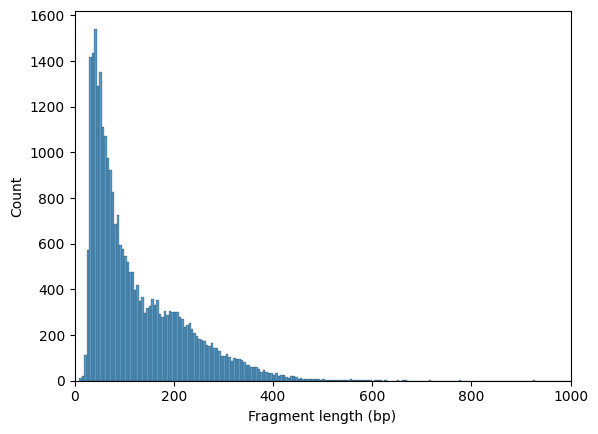

In [8]:
ac.pl.fragment_histogram(adata)

In [9]:
ac.tl.nucleosome_signal(adata, n=1e6)
adata.obs

Reading Fragments: 100%|██████████| 1000000/1000000 [00:04<00:00, 238787.07it/s]


,TN,UM,PP,UQ,CM,file,sample,nucleosome_signal
barcode,,,,,,,,
AAACTACCAGAAACCCGAGATA,28.0,21.0,21.0,21.0,1.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,1.000000
AAACTACCAGAAACCTAAGTGG,7116.0,6025.0,6011.0,6011.0,218.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,0.434524
AAACTACCAGAAACGGATCAGT,3692.0,3009.0,3004.0,3004.0,69.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,0.462500
AAACTACCAGAAACGTCCCGTT,21.0,19.0,19.0,19.0,0.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,1.000000
AAACTACCAGAAACTAGCCCTA,22.0,19.0,19.0,19.0,2.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,1.000000
...,...,...,...,...,...,...,...,...
TTCCATCCTCTTTCGCGTGTAA,4.0,4.0,4.0,4.0,0.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,1.000000
TTCCATCCTCTTTCTGCAGACT,584.0,506.0,506.0,506.0,27.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,0.421053
TTCCATCCTCTTTCTGGCGCAG,7.0,5.0,5.0,5.0,1.0,/mnt/workspace2/jdetlef/peakqc_paperprep/bench...,MB,0.000000


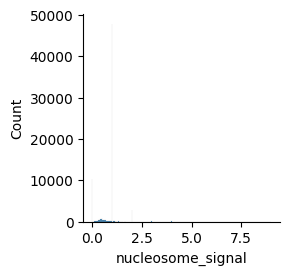

In [10]:
mu.pl.histogram(adata, "nucleosome_signal", kde=False)

### 5.2 Peakqc "FLD-score"

In [11]:
barcode_tag = 'CB'

Count insertsizes from fragments...
Starting counting fragments...


Processing Chunks: 8it [00:37,  4.68s/it]


Done reading file - elapsed time: 0:03:36
Converting counts to dataframe...
Done getting insertsizes from fragments!
plotting density...


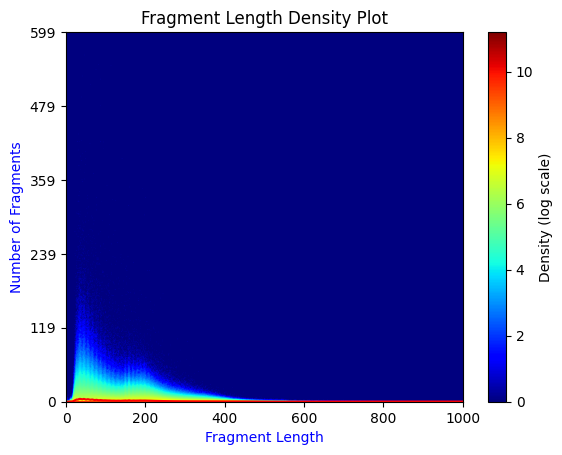

calculating scores using the custom continues wavelet transformation...


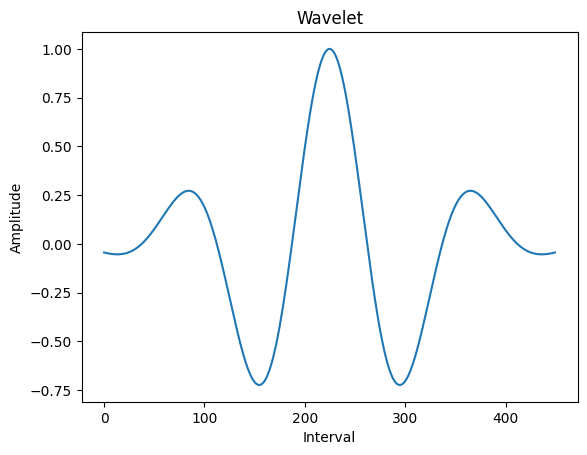

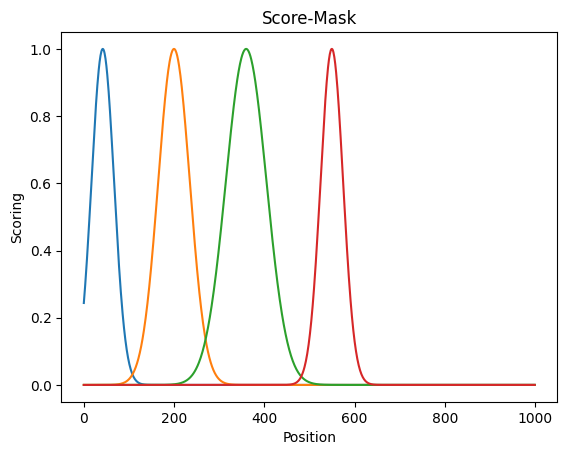

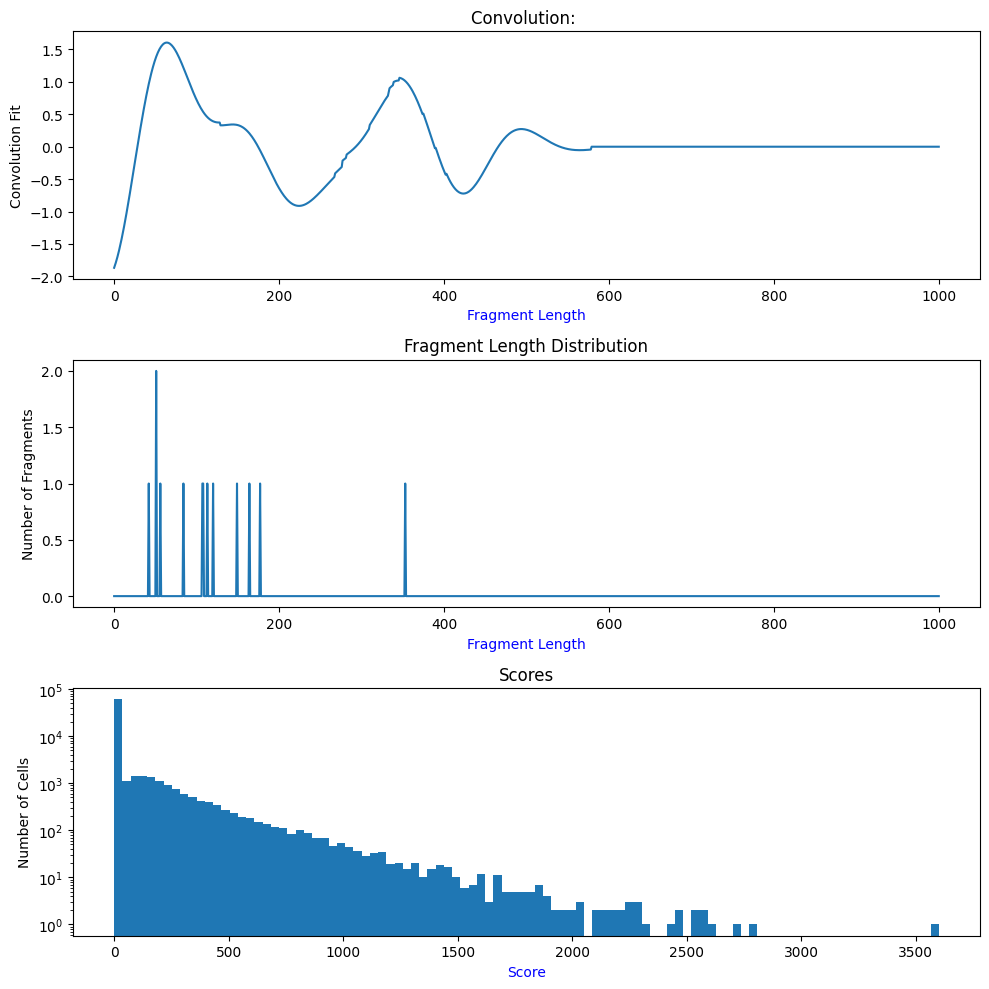

In [12]:
fld.add_fld_metrics(adata=adata,
                    fragments=fragments,
                    barcode_col=None,
                    barcode_tag=barcode_tag,
                    chunk_size_bam=1000000,
                    regions=None,
                    peaks_thr=10,
                    wavelength=150,
                    sigma=0.4,
                    plot=True,
                    save_density=None,
                    save_overview=None,
                    sample=0)

### 5.3 Sctoolbox promoter-overlap

In [13]:
# Additional settings for the overlap
region_name = 'promoters'
regions_file = '/mnt/flatfiles/organisms/new_organism/homo_sapiens/104/homo_sapiens.104.promoters2000.gtf'
genes_gtf = '/mnt/flatfiles/organisms/new_organism/homo_sapiens/104/homo_sapiens.104.genes.gtf'

In [14]:
tools.calc_overlap_fc.fc_fragments_in_regions(
    regions_file=regions_file,
    adata=adata,
    fragments_file=fragments,
    cb_col=None,
    regions_name=region_name,
    threads=8,
    temp_dir=None)

[INFO] Converting GTF to BED...
[INFO] Sorting fragments file...
[INFO] Finding overlaps...
[INFO] Calculating fold change...
[INFO] Adding results to adata object...
[INFO] cleaning up...
[INFO] removing tempfiles


### 5.4 Sctoolbox FRiP

In [15]:
adata, total_frip = tools.frip.calc_frip_scores(
    adata, 
    fragments, 
    temp_dir='')

[INFO] writing regions to bedfile


extract adata.var regions: 105042it [00:05, 18372.48it/s]

[INFO] overlapping bedfiles


[INFO] reading in bedfiles
[INFO] calculating total number of fragments and overlaps
[INFO] total_frip: 0.2374525459047365
[INFO] calculating FRiP scores per barcode
[INFO] count fragments per barcode
[INFO] counting fragments per barcode
[INFO] counting fragments per barcode
[INFO] calculating FRiP score per barcode and adding it to adata.obs


### 5.5 Sctoolbox TSSe

[INFO] adding tSSe score to adata object
[INFO] Preparing gtf file for annotation...
[INFO] - Reading gtf with Tabix
[INFO] - Index of gtf not found - trying to index gtf
[INFO] - Reading gtf with Tabix
[INFO] Done preparing gtf!
[INFO] building temporary TSS file
[INFO] sorting fragments
[INFO] overlapping fragments with TSS
[INFO] opening overlap file
[INFO] aggregating fragments


Aggregating: 100%|██████████| 60605/60605 [00:29<00:00, 2045.81it/s]


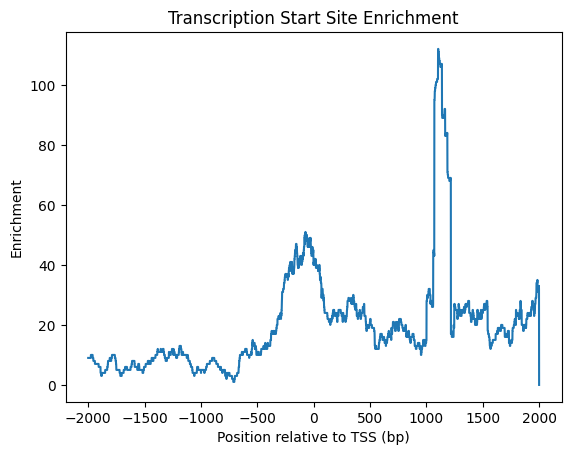

[INFO] calculating bias
[INFO] calculating per base tSSe
[INFO] calculating global tSSe score
[INFO] cleaning up temporary files


In [16]:
adata, tSSe_df = tools.tsse.add_tsse_score(
    adata,
    fragments=fragments,
    gtf=genes_gtf,
    negativ_shift=2000,
    positiv_shift=2000,
    edge_size_total=100,
    edge_size_per_base=50,
    min_bias=1.0,
    keep_tmp=False,
    temp_dir="",
    plot=True,
    return_aggs=True)

## 6. Annotate by CATLAS

In [17]:
def overlap_with_catlas(adata, reference_h5ad):
    
    catlas_adata = sc.read_h5ad(reference_h5ad)

    reference_index = catlas_adata.obs.index

    reference_barcodes = []

    for barcode in reference_index:
        barcode = barcode.split('+')[1]
        reference_barcodes.append(barcode)

    catlas_adata.obs.index = reference_barcodes
    
    adata.obs['catlas_ov'] = adata.obs.index.isin(reference_barcodes)
    
    adata.obs = adata.obs.join(catlas_adata.obs['cell type'])
    adata.obs = adata.obs.join(catlas_adata.obs['closest Cell Ontology term(s)'])
    
    

In [18]:
overlap_with_catlas(adata, reference_h5ad)
n_overlap = sum(adata.obs['catlas_ov'])
print(f'cells overlapping with CATLAS preprocessed data: {n_overlap}')

cells overlapping with CATLAS preprocessed data: 6553


## 7. Save Anndata

In [19]:
# Overview of loaded adata
display(adata)

AnnData object with n_obs × n_vars = 73582 × 105042
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nucleosome_signal', 'fld_score', 'mean_fragment_size', 'n_fragments', 'fold_change_promoters_fragments', 'frip', 'tsse_score', 'catlas_ov', 'cell type', 'closest Cell Ontology term(s)'
    var: 'peak_chr', 'peak_start', 'peak_end'
    uns: 'sctoolbox', 'files'

In [20]:
# Saving the data
adata_output = f"{output}/{sample}_ontology.h5ad"
utils.adata.save_h5ad(adata, adata_output)

[INFO] The adata object was saved to: /mnt/workspace2/jdetlef/peakqc_paperprep/benchmarking/assembled/right_atrium_auricular_region_IOBHN_ontology.h5ad
